#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

/Users/violetapascuallaborda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/violetapascuallaborda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


#### Importing data

In [2]:
BEBRASK_scales = pd.read_excel('/Users/violetapascuallaborda/Desktop/clustering/RETOS_scales.xlsx')
RETOS_scales = pd.read_excel('/Users/violetapascuallaborda/Desktop/clustering/BEBRASK_scales.xlsx')

In [3]:
RETOS_scales['Gender'] = RETOS_scales['Sex']
RETOS_scales.drop('Sex', axis=1, inplace= True)

RETOS_scales.columns = [col.replace('-', '_') for col in RETOS_scales.columns]

df = pd.concat([BEBRASK_scales, RETOS_scales])

#### *Participants analysis*

In [4]:
# Calculate the number and percentage of males and females
gender_counts = df['Gender'].value_counts()
gender_percentages = df['Gender'].value_counts(normalize=True) * 100

# Calculate the average age and its standard deviation
age_mean = df['Age'].mean()
age_std = df['Age'].std()

# Display results
print("Number of males and females:")
print(gender_counts)
print("\nPercentage of males and females:")
print(gender_percentages)
print("\nAverage age:")
print(age_mean)
print("\nStandard deviation of age:")
print(age_std)

Number of males and females:
Gender
F    115
M     35
Name: count, dtype: int64

Percentage of males and females:
Gender
F    76.666667
M    23.333333
Name: proportion, dtype: float64

Average age:
21.74

Standard deviation of age:
3.558579763457032


### **Preprocessing**

#### Grouping the metrics from scales that will be evaluated

In [5]:
df.isnull().sum()

SUBJECT_CODE       0
EPRIME_CODE        0
Gender             0
Age                0
PA                 0
NA.                0
ERQ_CR             0
ERQ_ES             0
UPPSP_NU           0
UPPSP_PU           0
UPPSP_SS           0
UPPSP_PMD          0
UPPSP_PSV          0
BIS                0
BAS_RR             0
BAS_D              0
BAS_FS             0
TEPS_AF            0
TEPS_CF            0
SHS                0
FS                 0
LOT_R              0
RRQ_Rum            0
RRQ_Ref            0
ASI_P              0
ASI_C              0
ASI_S              0
ZKPQ_N_ANX         0
ZKPQ_ACT           0
ZKPQ_SY            0
ZKPQ_IMPSS         0
ZKPQ_AGG_HOST      0
ZKPQ_INFREQ        0
SPQ               29
SPQ_IR            29
MSSB_POS          29
MSSB_NEG          29
MSSB_DES          29
PHQ9             150
BSL23            150
AQS              150
IUS               95
BEH               95
DASS_D            95
DASS_A            95
DASS_S            95
dtype: int64

In [6]:
PANAS = ["PA", "NA."]
ERQ = ["ERQ_CR", "ERQ_ES"]
UPPSP = ["UPPSP_NU", "UPPSP_PU", "UPPSP_SS", "UPPSP_PMD", "UPPSP_PSV"]
BIS_BAS = ["BIS", "BAS_D", "BAS_RR", "BAS_FS"]
TEPS = ["TEPS_AF", "TEPS_CF"]
SHS = ["SHS"]
FS = ["FS"]
LOTR = ["LOT_R"]
RRQ = ["RRQ_Rum", "RRQ_Ref"]
ASI3 = ["ASI_P", "ASI_C", "ASI_S"]
ZKPQ = ["ZKPQ_N_ANX", "ZKPQ_ACT", "ZKPQ_SY", "ZKPQ_IMPSS", "ZKPQ_AGG_HOST", "ZKPQ_INFREQ"]  
SPQ = ["SPQ", "SPQ_IR"]
MSSB = ["MSSB_POS", "MSSB_NEG", "MSSB_DES"]

list_metrics = PANAS + ERQ + UPPSP + BIS_BAS + TEPS + SHS + FS + LOTR + RRQ + ASI3 + ZKPQ + SPQ + MSSB

In [7]:
# Select the columns from the DataFrame
df.reset_index(drop=True, inplace=True)
participant_ID = df['EPRIME_CODE']
df = df[list_metrics]
df.dtypes

PA                 int64
NA.                int64
ERQ_CR           float64
ERQ_ES            object
UPPSP_NU           int64
UPPSP_PU           int64
UPPSP_SS           int64
UPPSP_PMD         object
UPPSP_PSV          int64
BIS                int64
BAS_D              int64
BAS_RR             int64
BAS_FS             int64
TEPS_AF            int64
TEPS_CF            int64
SHS              float64
FS                 int64
LOT_R              int64
RRQ_Rum          float64
RRQ_Ref          float64
ASI_P             object
ASI_C             object
ASI_S              int64
ZKPQ_N_ANX        object
ZKPQ_ACT          object
ZKPQ_SY           object
ZKPQ_IMPSS        object
ZKPQ_AGG_HOST     object
ZKPQ_INFREQ        int64
SPQ              float64
SPQ_IR            object
MSSB_POS         float64
MSSB_NEG         float64
MSSB_DES         float64
dtype: object

#### Remove columns with more than 50 NaN

In [8]:
# Convert all data to numeric and change to NaN those values that can not be converted
cols = df.columns
df[cols[:]] = df[cols[:]].apply(pd.to_numeric, errors='coerce')
nan_counts = df.isna().sum()

# Filter the DataFrame to include columns where the count of NaN is less than or equal to 50
columns_with_fewer_nans = nan_counts[nan_counts <= 50].index.tolist()
df = df[columns_with_fewer_nans]

In [9]:
df.isnull().sum()

PA                0
NA.               0
ERQ_CR            0
ERQ_ES            1
UPPSP_NU          0
UPPSP_PU          0
UPPSP_SS          0
UPPSP_PMD         1
UPPSP_PSV         0
BIS               0
BAS_D             0
BAS_RR            0
BAS_FS            0
TEPS_AF           0
TEPS_CF           0
SHS               0
FS                0
LOT_R             0
RRQ_Rum           0
RRQ_Ref           0
ASI_P             1
ASI_C             1
ASI_S             0
ZKPQ_N_ANX        2
ZKPQ_ACT          2
ZKPQ_SY           4
ZKPQ_IMPSS        1
ZKPQ_AGG_HOST     1
ZKPQ_INFREQ       0
SPQ              29
SPQ_IR           30
MSSB_POS         29
MSSB_NEG         29
MSSB_DES         29
dtype: int64

#### Filling Nan values using a RandomForestRegressor

In [10]:
# Identify columns with at least one NaN value
columns_with_NaN = df.isnull().any()
columns_with_NaN = columns_with_NaN[columns_with_NaN].index.tolist()
print('Scales with at least one NaN value:', columns_with_NaN, '\n')

# Filling with RandomForest
for var in columns_with_NaN:
    # Filter non-NaN rows for the current variable
    aux = df.drop(var, axis=1)
    
    # Impute temporary values to train the model
    imputer = SimpleImputer(strategy='mean')
    X = aux[df[var].notna()]
    X_imputed = imputer.fit_transform(X)
    
    y = df.loc[X.index, var]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = RandomForestRegressor(n_estimators=1000, criterion='absolute_error', max_features='sqrt', min_samples_split=15)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate RMSE for test predictions
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Test RMSE for {var}: {rmse}')
    
    # Calculate RMSE for mean imputation
    mean_value = y_train.mean()
    repeated_means = np.full(y_test.shape, mean_value)  # Ensure same length as y_test
    rmse_mean = np.sqrt(mean_squared_error(y_test, repeated_means))
    print(f'Mean RMSE for {var}: {rmse_mean}\n')
    
    # Predict the missing values
    missing_indices = df[df[var].isna()].index
    X_missing = aux.loc[missing_indices]
    X_missing_imputed = imputer.transform(X_missing)
    df.loc[missing_indices, var] = model.predict(X_missing_imputed)

Scales with at least one NaN value: ['ERQ_ES', 'UPPSP_PMD', 'ASI_P', 'ASI_C', 'ZKPQ_N_ANX', 'ZKPQ_ACT', 'ZKPQ_SY', 'ZKPQ_IMPSS', 'ZKPQ_AGG_HOST', 'SPQ', 'SPQ_IR', 'MSSB_POS', 'MSSB_NEG', 'MSSB_DES'] 



Test RMSE for ERQ_ES: 1.208303271034084
Mean RMSE for ERQ_ES: 1.2991033367505944

Test RMSE for UPPSP_PMD: 2.294357900372128
Mean RMSE for UPPSP_PMD: 2.69443530998885

Test RMSE for ASI_P: 4.341572629819752
Mean RMSE for ASI_P: 5.559597224222008

Test RMSE for ASI_C: 3.4314724949113806
Mean RMSE for ASI_C: 4.733582689144784

Test RMSE for ZKPQ_N_ANX: 2.7349426608858427
Mean RMSE for ZKPQ_N_ANX: 4.654330591894193

Test RMSE for ZKPQ_ACT: 3.301459179918278
Mean RMSE for ZKPQ_ACT: 3.6651446703194885

Test RMSE for ZKPQ_SY: 3.1378083102169687
Mean RMSE for ZKPQ_SY: 3.392149548188153

Test RMSE for ZKPQ_IMPSS: 2.5765532871777883
Mean RMSE for ZKPQ_IMPSS: 3.7229454673296645

Test RMSE for ZKPQ_AGG_HOST: 2.794170331541488
Mean RMSE for ZKPQ_AGG_HOST: 3.160581173835183

Test RMSE for SPQ: 1.5119321909397923
Mean RMSE for SPQ: 1.6800349285390201

Test RMSE for SPQ_IR: 1.496643898304915
Mean RMSE for SPQ_IR: 1.6713475933442983

Test RMSE for MSSB_POS: 1.8159345472786181
Mean RMSE for MSSB_POS: 1

#### Imputing the missing values using RandomForestRegressor results in a smaller RMSE compared to imputing them with the mean

### **Preliminary Analysis**

#### Number of participants and scales

In [11]:
print('Number of subjects:', df.shape[0])
print('Number of scales:', df.shape[1])

Number of subjects: 150
Number of scales: 34


#### Scales distribution

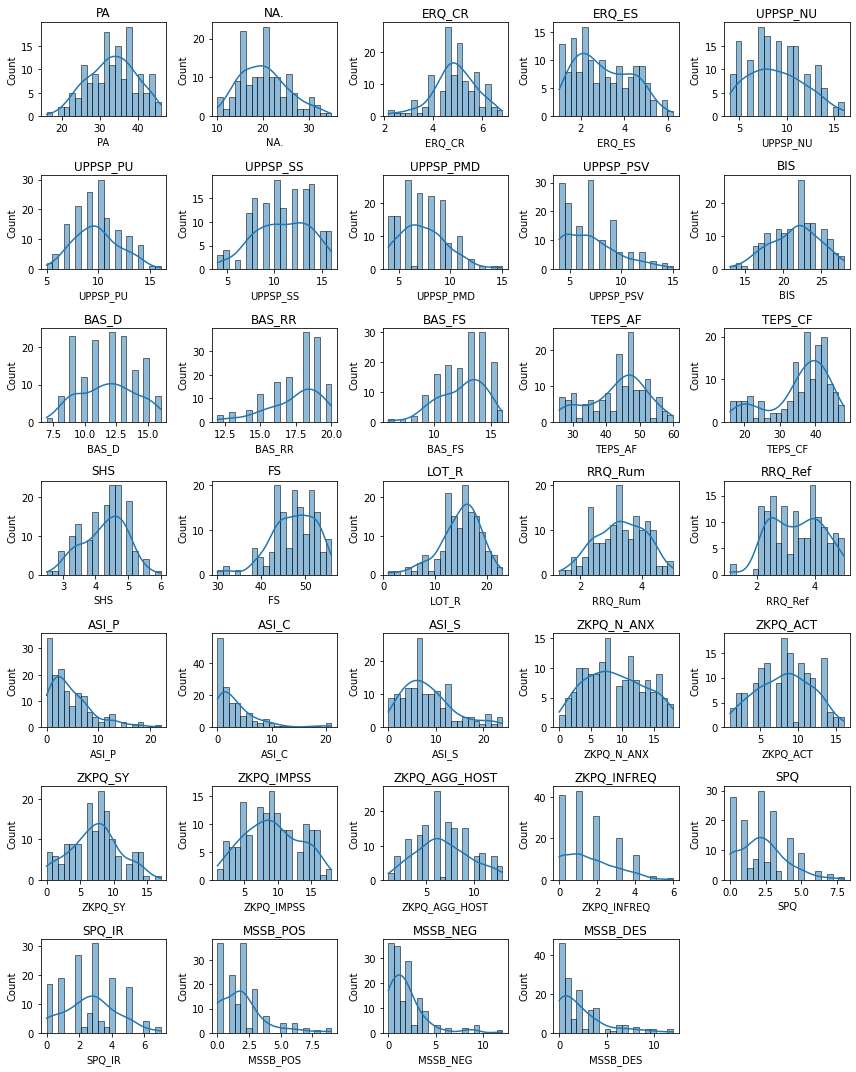

In [12]:
# Distribution plots
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(12, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=20, ax=axes[i], kde=True)
    axes[i].set_title(col)
        
axes[-1].spines['top'].set_visible(False)
axes[-1].spines['right'].set_visible(False)
axes[-1].spines['bottom'].set_visible(False)
axes[-1].spines['left'].set_visible(False)
axes[-1].set_xticks([])
axes[-1].set_yticks([])

plt.tight_layout()
plt.show()

#### Correlation matrix

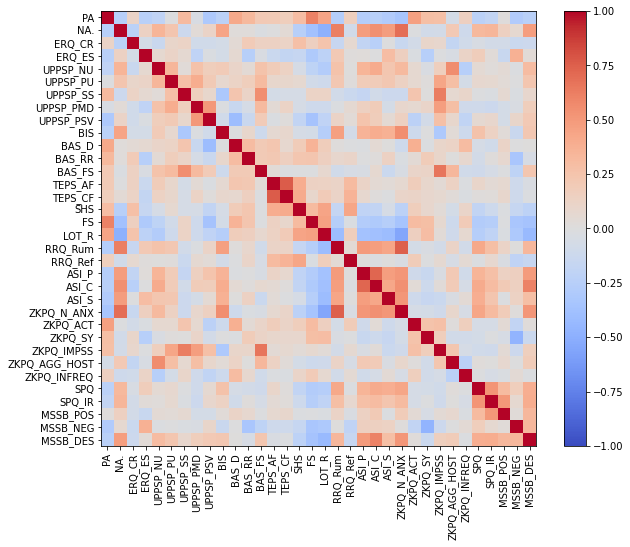

In [13]:
# Correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.show()

### **Save scales preprocessed**

In [15]:
df['Participant_ID'] = participant_ID
df.to_excel('/Users/violetapascuallaborda/Desktop/Analysis/Wellbeing_Scales.xlsx', index=False)

/var/folders/3s/4d1my8ts76j3xs22jwl80rym0000gn/T/ipykernel_20102/2748472937.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df.to_excel('/Users/violetapascuallaborda/Desktop/Analysis/Wellbeing_Scales.xlsx', index=False)
